<div style="border:solid orange 2px; padding: 20px"> <h7 style="color:black; margin-bottom:20px">Привет! Меня зовут Миша, я буду проводить ревью на этом спринте. 
Мои комментарии и замечания далее по тексту помечены различными цветами:
    
---    
<div class="alert alert-block alert-danger">
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
Когда всё сделано правильно.
</div>
    
---
    
Удачи!
    
p.s.: не удаляй комментарии ревьюера, если предстоит что то доработать в проекте.</h7>

# Сборный проект

Проект для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
На руках есть данные до 2016 года. Требуется спланировать кампанию на 2017-й.  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Выгрузка данных

In [58]:
# Импортируем необходимые библиотеки и модули
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [59]:
# Считаем данные из датасета calls, проверим корректность выгрузки
games_data = pd.read_csv('/datasets/games.csv')
games_data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [60]:
# Расмотрим общую информацию о данных
games_data.info()
games_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


В таблице internet 11 столбцов. В них содержится информация о, исторических данных о продажах игр, оценки пользователей и экспертов, жанры и платформы :  
* **Name** — название игры
* **Platform** — платформа
* **Year_of_Release** — год выпуска
* **Genre** — жанр игры
* **NA_sales** — продажи в Северной Америке (миллионы долларов)
* **EU_sales** — продажи в Европе (миллионы долларов)
* **JP_sales** — продажи в Японии (миллионы долларов)
* **Other_sales** — продажи в других странах (миллионы долларов)
* **Critic_Score** — оценка критиков (максимум 100)
* **User_Score** — оценка пользователей (максимум 10)
* **Rating** — рейтинг от организации ESRB 

В данных есть пропуски. В столбцах Genre и Name одинаковое количество пропусков. Столбец *year_of_release* можно было бы привести к временному типу, но так как он содержит только год, то проще привести его к целочисленному типу. Столбец *User_Score* нужно привести к вещественному типу.

<div class="alert alert-block alert-success">
Здесь всё хорошо
</div>
    
---
    

In [61]:
# Изучим виды рейтингов от ESRB 
games_data['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

Согласно [данным источника](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board) эти рейтинги обозначают следующее:
* **E** («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.  
* **T** («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
* **M** («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
* **E10+** («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови. 
* **EC** («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.
* **RP** («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.
* **K-A** ("Kids to Adults") —  до 1998 года так назывался рейтинг **Е**
* **AO**  («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. В большинстве стран этот рейтинг приравнивается к порнографии.

In [62]:
# Проверим данные на наличие дубликатов 
games_data.duplicated().sum()

0

## Предобработка данных

In [63]:
# Заменим названия столбцов, приведя их к нижнему регистру
games_data.columns = games_data.columns.str.lower()
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [64]:
# Проверим пропуски в столбце name 
games_data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим что строки с пропусками в *name* и *genre* совпадают. С этими данными нельзя сделать ничего полезного, поэтому просто удалим их.

In [65]:
# Удалим пропуски и проверим результат
games_data.drop(games_data.query('name.isna()').index, inplace=True)
games_data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [66]:
# Проверим пропуски в столбце year_of_release 
games_data.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Видим, что часть игр содержат год в своем названии. Взяв информацию оттуда можно заполнить часть пропусков в стобце.

In [67]:
# Создадим список с годами, приведенными к строковому типу, выведем первые пять элементов
list_of_year = list( map(lambda x: str(x), list(range(1980, 2017))))
list_of_year[:5] 

['1980', '1981', '1982', '1983', '1984']

In [68]:
# Создадим вспомогательную функцию, которая разбивает название игры на слова и находит пересечение со списком лет
# Если пересечения нет, то возвращает 0
def year_fill(data):
    if np.isnan(data['year_of_release']):
        year = set.intersection(*map(set, [data['name'].split(), list_of_year]))
        return (int(list(year)[0])) if len(year) else 0
    else:
        return data['year_of_release']

In [69]:
# Заполним пропуски и проверим результат
games_data['year_of_release'] = games_data.apply(year_fill, axis = 1)
len(games_data.query('year_of_release == 0'))

254

Заполнилось не так много пропусков, как хотелось бы. Для заполнения оставшихся пропусков можно было бы написать парсер, который распознавал информацию с метакритика или википедии, но в данной работе ограничимся следующим приемом. В качестве года выхода будем ставить медианное время жизни платформы, на которой вышла игра.

<div class="alert alert-block alert-success">
Не мог не отметить эту хорошую задумку. Пусть и не так много данных удалось заполнить этот прием я считаю удачным. Решение заполнить медианным значением жизни платформы аналогично считаю корректным
</div>
    
---
    

In [70]:
lifetime = games_data.groupby('platform').agg(median_year=('year_of_release','median'))
lifetime.head(5)

,median_year
platform,
2600,1981.0
3DO,1995.0
3DS,2013.0
DC,2000.0
DS,2008.0


In [71]:
# Создадим вспомогательную функцию
def lifetime_fill(data):
    if data['year_of_release'] == 0:
        return lifetime.loc[data['platform']]        
    else:
        return data['year_of_release']

In [72]:
# Заполним пропуски и проверим результат
games_data['year_of_release'] = games_data.apply(lifetime_fill, axis = 1)
print(len(games_data.query('year_of_release == 0')))
print(len(games_data.query('year_of_release.isna()')))

0
0


In [73]:
# Приведем столбец к целочисленному типу и проверим результат
games_data['year_of_release'] = games_data['year_of_release'].astype('int')
games_data['year_of_release'].dtype

dtype('int64')

In [74]:
# Проверим столбец с пользовательскими оценками
games_data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
9.6       2
1.1       2
0.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Аббреиватура tbd обозначает *to be determined*, то есть рейтинг еще не определен. Заменим эти значения на None.

<div class="alert alert-block alert-success">
Даннная замена имеет право быть
</div>
    
---
    

In [75]:
# Заменим еив на None и проверим результат
games_data.loc[games_data['user_score'] == 'tbd', 'user_score'] = None
print(len(games_data.query('user_score == "tbd"')))
print(len(games_data.query('user_score.isna()')))

0
9123


In [76]:
# Приведем столбец к вещественному типу и проверим результат
games_data['user_score'] = games_data['user_score'].astype('float')
games_data['user_score'].dtype

dtype('float64')

Приведем в порядок столбец с рейтингом.

In [77]:
# Вспомним виды рейтингов от ESRB 
games_data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [78]:
# Узнаем какая игра получила АО
games_data.query('rating == "AO"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
875,Grand Theft Auto: San Andreas,XB,2005,Action,1.26,0.61,0.0,0.09,93.0,8.6,AO


Данный рейтинг связан со сканадалом, вызванным модификацией [Hot coffee](https://ru.wikipedia.org/wiki/Hot_Coffee). Когда разработчики патчем заблокировали модификацию, рейтинг был снижен к предыдущему. 

In [79]:
# Проверим, какой рейтинг был у ГТА на других плафтормах
games_data.query('name == "Grand Theft Auto: San Andreas"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M
875,Grand Theft Auto: San Andreas,XB,2005,Action,1.26,0.61,0.00,0.09,93.0,8.6,AO
2115,Grand Theft Auto: San Andreas,PC,2005,Action,0.00,0.93,0.00,0.04,93.0,8.9,M
10311,Grand Theft Auto: San Andreas,X360,2008,Action,0.08,0.02,0.00,0.01,NaN,7.5,M


На остальнх платформах ГТА продавалась с рейтингом *М*, поэтому *АО* можно таке замениь на *М*.  
Рейтинг *RP* заменим на *None*, рейтинги *K-A* и *EC* заменим на ближайшие по смыслу рейтинг *Е*.

<div class="alert alert-block alert-success">
ЗДесь тоже не буду спорить. Всё корреткно
</div>
    
---
    

In [80]:
# Заменим рейтинги и проверим результат
games_data['rating'].replace('RP', None, inplace=True)
games_data['rating'].replace('K-A', 'E', inplace=True)
games_data['rating'].replace('EC', 'E', inplace=True)
games_data['rating'].replace('AO', 'M', inplace=True)
games_data['rating'].value_counts()

E       4002
T       2962
M       1564
E10+    1420
Name: rating, dtype: int64

In [81]:
# Посчитаем общую прибыль по всем регионам
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Исследовательский анализ данных

In [82]:
# Выведем года с наибольшим числом выпущенных игр
games_data['year_of_release'].value_counts().head(10)

2009    1492
2008    1458
2010    1283
2007    1198
2011    1162
2006    1008
2005     941
2002     830
2004     809
2003     803
Name: year_of_release, dtype: int64

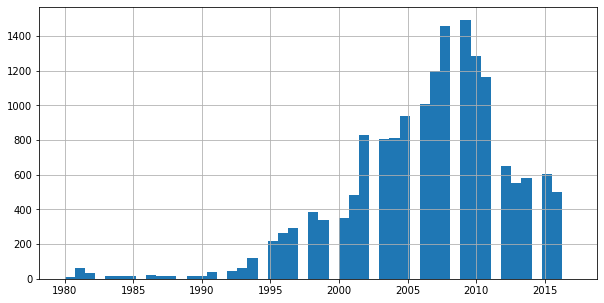

In [83]:
# Посторим гистограмму по годам
games_data['year_of_release'].hist(bins=50, range=(1980, 2017), figsize=(10,5))

Значительное снижение количества выпущенных игр после 2010 года, скорее всего вызванно следующим. Совпали два события:  
1. Кризис 2008 года, когда закрылись многие мелкие фирмы разработчики  
2. Пик жизни очередного поколения консолей (PS3 и Xbox360), рост качества графики, а также требований к качеству и геймдизайну, из-за чего стоимость и врмея разработки значительно повысились.

<div class="alert alert-block alert-success">
Вполне адекватные причины для объяснения такого спада
</div>
    
---
    

In [84]:
# Выведем топ продаж по платформам
platforms = (games_data
 .groupby(['platform']) 
 .agg(
     games_count = ('total_sales', 'count'),
     total_revenue = ('total_sales', 'sum' )
 )
)
platforms.sort_values(by='total_revenue', ascending=False).head(10)

,games_count,total_revenue
platform,,
PS2,2161,1255.77
X360,1262,971.42
PS3,1331,939.65
Wii,1320,907.51
DS,2151,806.12
PS,1197,730.86
GBA,822,317.85
PS4,392,314.14
PSP,1209,294.05


In [85]:
# Выведем топ по количеству игр на платформах
platforms.sort_values(by='games_count', ascending=False).head(10)

,games_count,total_revenue
platform,,
PS2,2161,1255.77
DS,2151,806.12
PS3,1331,939.65
Wii,1320,907.51
X360,1262,971.42
PSP,1209,294.05
PS,1197,730.86
PC,974,259.52
XB,824,257.74


Списки почти идентичны, только во втором списке первый Xbox заменил PS4. Для дальнейшего исследования возьмем топ 11 платформ вместе с Xbox.

In [86]:
# Составим список топ 11 плафторм и отсортируем его
top_platforms = list(platforms.sort_values(by="total_revenue", ascending=False).head(10).index)
top_platforms.append("XB")
top_platforms.sort()
top_platforms

['DS', 'GBA', 'PC', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'Wii', 'X360', 'XB']

In [87]:
# Сделаем срез данных по этим платформам
top_platforms_data = games_data.query('platform.isin(@top_platforms)')
top_platforms_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [88]:
# Сгруппируем данные по годам и плафтормам
top_platforms_grouped = (top_platforms_data
                         .query('year_of_release!=0 and ~(platform=="DS" and year_of_release==1985)')
                         .groupby(['platform','year_of_release']) 
                         .agg(
                             games_count = ('total_sales', 'count'),
                             total_revenue = ('total_sales', 'sum' )
                         )
                        )
top_platforms_grouped 

games_count  total_revenue
platform year_of_release                            
DS       2004                      23          17.27
         2005                     118         130.14
         2006                     201         119.81
         2007                     376         146.94
         2008                     522         148.65
...                               ...            ...
XB       2004                     195          70.50
         2005                     180          49.23
         2006                      62          10.04
         2007                       3           0.55
         2008                       1           0.18

[125 rows x 2 columns]

Посмотрим, как менялись продажи по платформам за годы. Для удобства сгруппируем данные следующим образом:  
* 1 группа: **PS, PS2, PS3, PS4** - 4 последовательных поколений одной консоли
* 2 группа: **X360, XB, Wii** - 3 домашних стационарных консоли
* 3 группа: **DS, GBA, PSP** - 3 поративных консоли
* 4 группа: **PC** - ПК выделим в отдельную группу, так как ПК не имеет жизненного цикла как такого. ПК вечен.

<div class="alert alert-block alert-success">
Логичное разделение
</div>
    
---
    

In [89]:
def graph_build(consoles_list, g_title):
    fig = plt.figure(figsize=(15,10))
    timeline = list(range(top_platforms_grouped.loc[consoles_list[0]].index.min(),
                          top_platforms_grouped.loc[consoles_list[-1]].index.max())
                   )    
    
    ax_1 = fig.add_subplot(211)
    ax_2 = fig.add_subplot(212)
    for i in consoles_list:
        x = top_platforms_grouped.loc[i].index
        y1 = top_platforms_grouped.loc[i]['games_count']
        y2 = top_platforms_grouped.loc[i]['total_revenue']
        ax_1.plot(x, y1)
        ax_2.plot(x, y2)
    
    ax_1.set(title=g_title+": games count", xticks=timeline)
    ax_1.grid(True)
    ax_1.legend(tuple(consoles_list))
    ax_1.set_xlabel('Year')
    ax_1.set_ylabel('Count')
    ax_1.tick_params(labelrotation=45)


    ax_2.set(title=g_title+": total revenue", xticks=timeline)
    ax_2.grid(True)
    ax_2.legend(tuple(consoles_list))
    ax_2.tick_params(labelrotation=45)

    plt.xlabel('Year')
    plt.ylabel('Revenue')
    fig.tight_layout()
    plt.show()

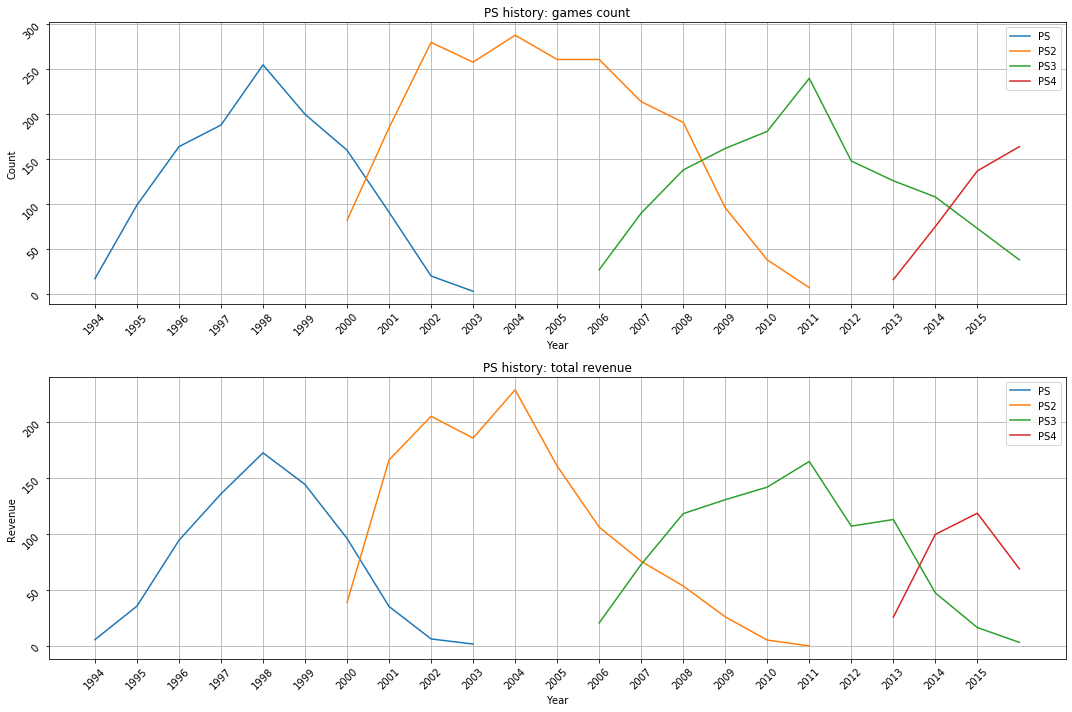

In [90]:
# Посторим графики по 1 группе
graph_build(['PS', 'PS2', 'PS3', 'PS4'], "PS history")

По графикам видно в среднем жизненный цикл поколения длится около 10 лет, плюс минус один год. 

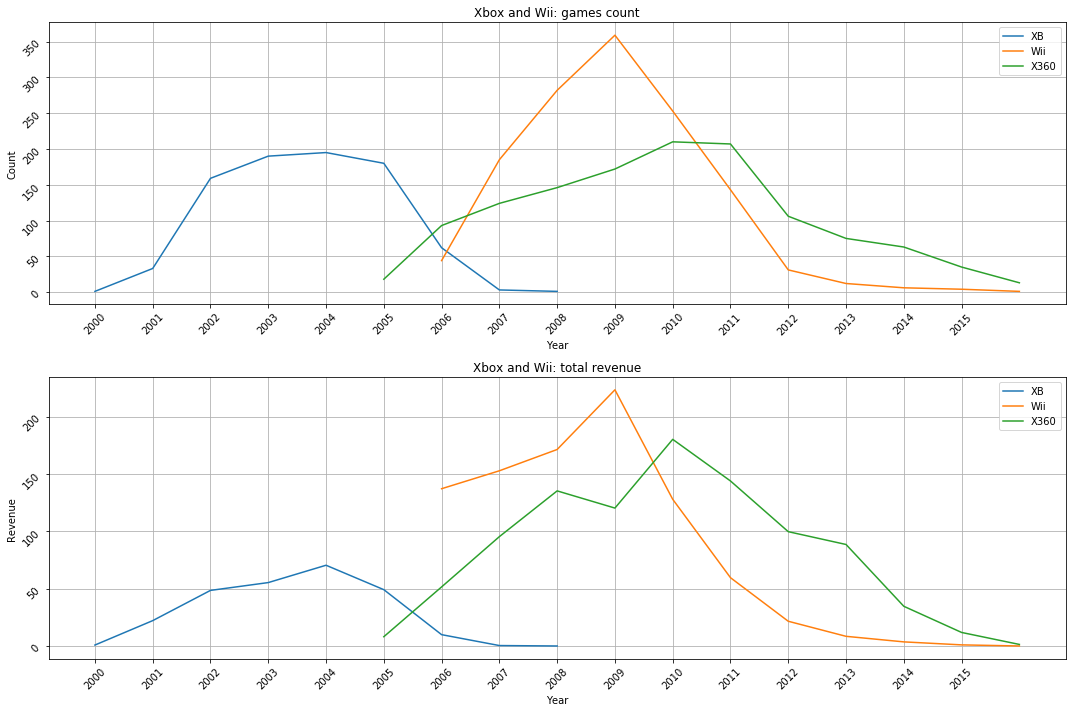

In [91]:
# Посторим графики по 2 группе
graph_build(['XB', 'Wii', 'X360'], "Xbox and Wii")

Жизненый цикл так же равен примерно 10 лет. 

<div class="alert alert-block alert-danger">
Здесь ошибка в описании графика
</div>
    
---
    

<div style="border:solid  violet  5px; padding: 20px"> <h1 style="color: violet ; margin-bottom:20px">Комментарий ученика</h1>

Исправил.

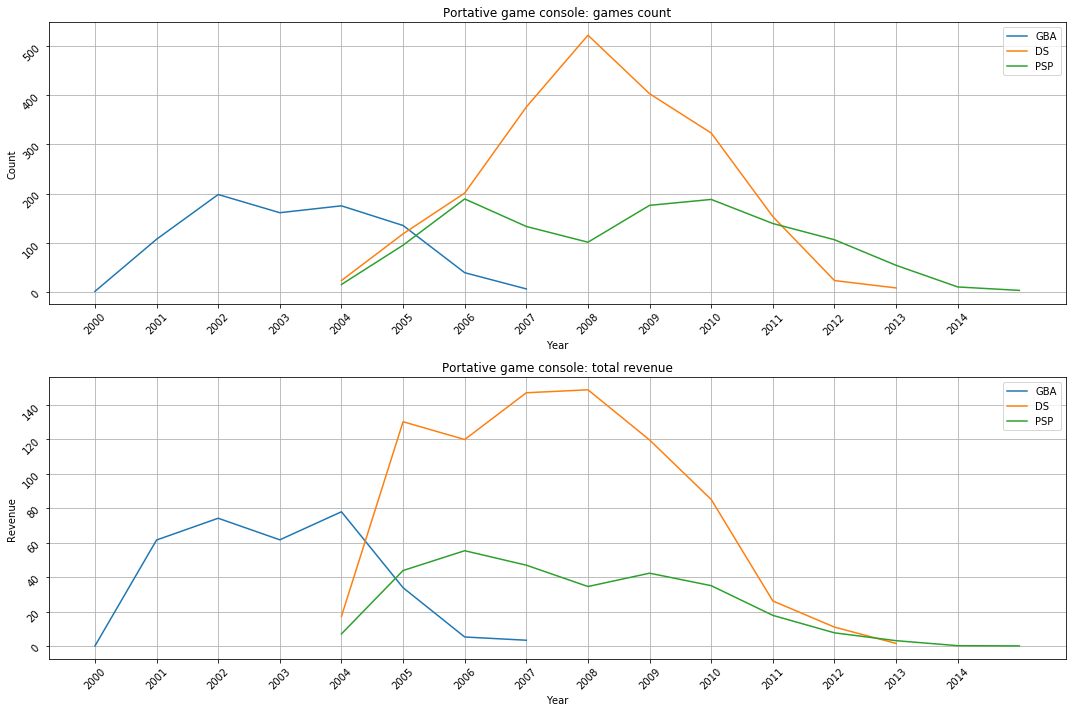

In [92]:
# Посторим графики по 3 группе
graph_build(['GBA',  'DS','PSP'], "Portative game console")

Жизненый цикл так же равен примерно 10 лет. Nintendo DS заметно превышает по показателям остальные поративные  и даже домашние консоли. Это вызвано повышенной популярностью данной консоли в азиатских странах, в частности Японии и Китае.

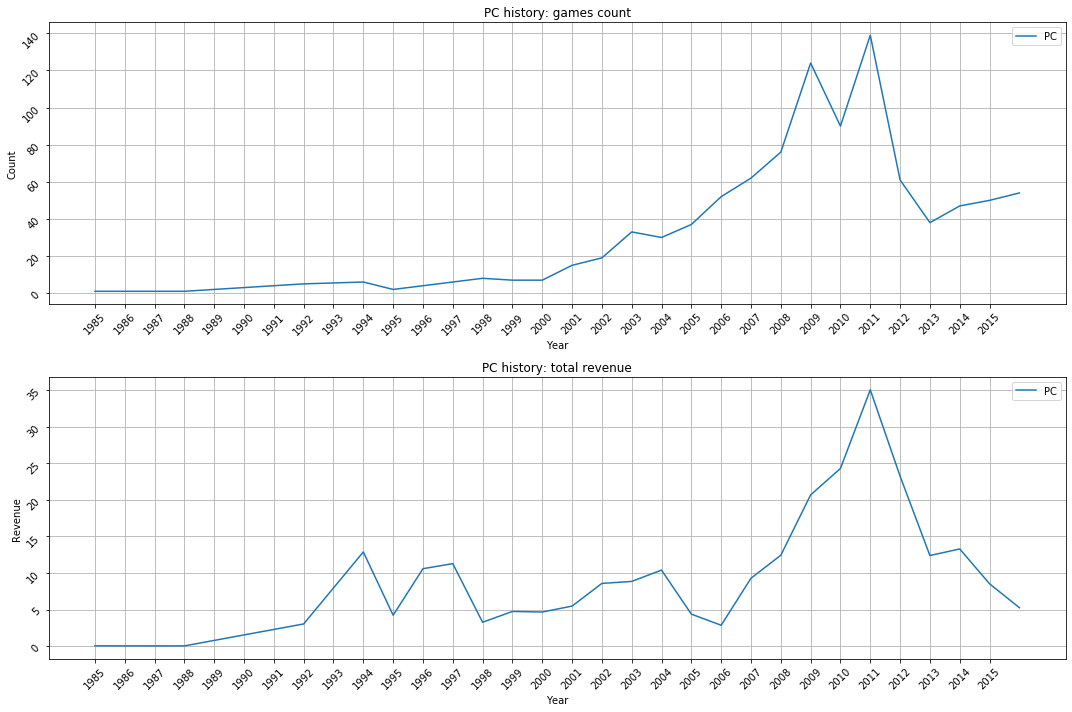

In [93]:
# Посторим графики по 4 группе
graph_build(['PC'], "PC history")

Можно заметить что все локальные экстремумы приходятся либо на год пика популярности поколения консолей (все играют на консолях, и продажи на ПК проседают), либо на год перехода на новое поколение (на новых консолях пока мало игр, поэтому все мултиплатформенные новинки покупают на ПК). Где-то в 2008-20011 году  начал резко разиваться дешевый высокоскоростной интернет. Как следствие начало развиваться пиратство: игры стали массово качать с торрентов. Плюс начали распространяться онлайн магазины по типу Steam - в результате коробочные продажи стали снижаться.

<div class="alert alert-block alert-danger">
Аналогичная ошибка + посмотри, ты делал одни и те же действия три раза. Не проще всё это завернуть в одну функцию и потом ее вызывать?
</div>
    
---
    

<div style="border:solid  violet  5px; padding: 20px"> <h1 style="color: violet ; margin-bottom:20px">Комментарий ученика</h1>

Исправил описание + добавил функцию для построения графиков.

<div class="alert alert-block alert-success">
Верное замечание по поводу физических носителей
</div>
    
---
    

Определим актуальный период для дальнейшего анализа. В этот период входит текущее поколение консолей (PS4 и Xone).

In [94]:
# Узнаем, когда вышел Xone 
games_data.query('platform == "XOne"')['year_of_release'].min()

2013

Xone вышел в тот же год, что и PS4. Поэтому возьмем за актуальный период 2013 - 2016.

<div class="alert alert-block alert-success">
С этим срезом я согласен
</div>
    
---
    

In [95]:
# Сделаем срез данных с 2013 года
relevant_game_data = games_data.query('year_of_release >= 2013')
relevant_game_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [96]:
# Выведем перечень живых платформ в этот период
relevant_game_data['platform'].value_counts()

PS4     392
PSV     359
PS3     345
3DS     311
XOne    247
PC      189
X360    186
WiiU    115
PSP      67
Wii      23
DS        8
Name: platform, dtype: int64

Последние три платформы - это "хвост" от предыдущего поколения, доживающего свои последние дни. Выбросим их из данных.

In [97]:
# Уберем эти плафтормы из среза
relevant_game_data = games_data.query('year_of_release >= 2013 and ~platform.isin(["PSP", "DS", "Wii"])')
relevant_game_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [98]:
# Сгруппируем данные и выведем топ по продажам
relevant_platforms = (relevant_game_data
             .groupby(['platform']) 
             .agg(
                 games_count = ('total_sales', 'count'),
                 total_revenue = ('total_sales', 'sum' )
             )
            )
relevant_platforms.sort_values(by='total_revenue', ascending=False).head(10)

,games_count,total_revenue
platform,,
PS4,392,314.14
PS3,345,181.43
XOne,247,159.32
3DS,311,144.44
X360,186,136.80
WiiU,115,64.63
PC,189,39.43
PSV,359,33.25


In [99]:
# Выведем топ по колчисетву проданных игр
relevant_platforms.sort_values(by='games_count', ascending=False).head(10)

,games_count,total_revenue
platform,,
PS4,392,314.14
PSV,359,33.25
PS3,345,181.43
3DS,311,144.44
XOne,247,159.32
PC,189,39.43
X360,186,136.80
WiiU,115,64.63


(-0.1, 1.75)

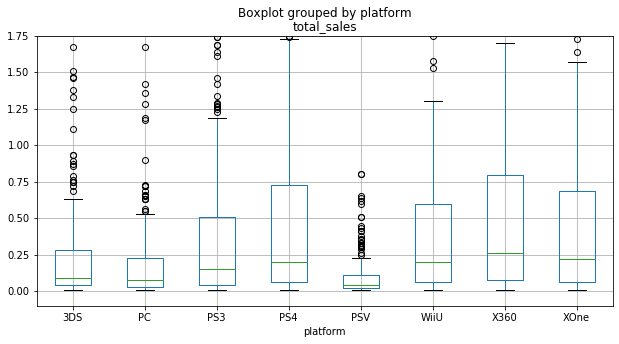

In [100]:
# Посторим boxplot по плафтормам по выручке
relevant_game_data.boxplot('total_sales', by='platform', figsize=(10,5)) 
plt.ylim(-0.1, 1.75)

Больше всего продаж на PS3, PS4 и обоих Xbox. У PSV самые низкие продажи. В игровой прессе считается, что PSV - это одна из самых плохих консолей от Sony.

<div class="alert alert-block alert-success">
Наглядный график boxplot. Молодец
</div>
    
---
    

In [101]:
# Сделаем срез по самой популярной консоли
ps4_data = relevant_game_data.query('platform =="PS4"')
ps4_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


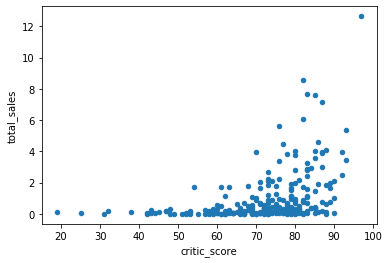

In [102]:
# Построим диаграмму рассеяния для оценок критиков
ps4_data.plot.scatter('critic_score', 'total_sales')

Ради интереса рассмотрим точку в правом верхнем углу. Скорее всего это будет самая высокооценнаая и самамая продаваемая игра всех времен - GTA 5.

In [103]:
# Проверим эту гипотезу
ps4_data.query('critic_score == critic_score.max()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Да, так и есть.

(0, 3)

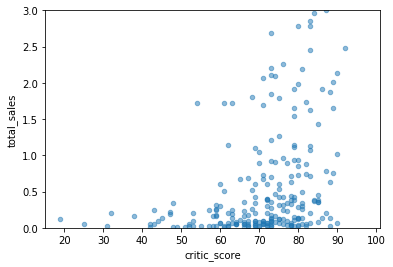

In [104]:
# Вернемся к предыдущей диаграмме и увеличим масштаб
ps4_data.plot.scatter('critic_score', 'total_sales', alpha=0.5)
plt.ylim(0, 3)

Если оценки критиков меньше 60 балов, то игра очень плохо продается. А еще это вызвано тем, что обычно игровая пресса не делает обзоры и не ставит оценки совсем уж трешовым и проходным играм. Поэтому 60 баллов - это как раз тот минимальный порог, который они ставят. Этим же фактом объясняется большое количество пропусков в столбце с оенцокй от критиков.

(0, 3)

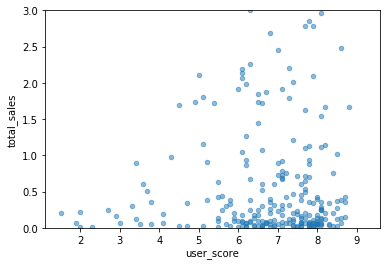

In [105]:
# Посторим аналогичную диаграмму для пользовательских оценок
ps4_data.plot.scatter('user_score', 'total_sales', alpha=0.5)
plt.ylim(0, 3)

Игроки уже не такие притязательные, как критики, поэтом играют во что попало, поэтому продажи низкооценнненых игр относительно неплохие.

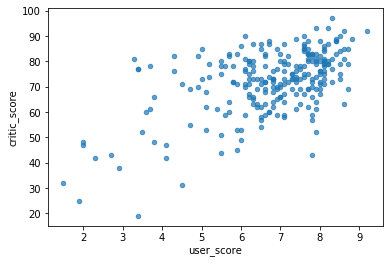

In [106]:
# Посмтроим диаграмму зависимости оценок между собой
ps4_data.plot.scatter('user_score', 'critic_score', alpha=0.7)

Зависимость почти линейная.

In [107]:
# Посчитаем корреляцию между отзывами и продажами.
ps4_data[['total_sales', 'critic_score', 'user_score']].corr()['total_sales']

total_sales     1.000000
critic_score    0.406568
user_score     -0.031957
Name: total_sales, dtype: float64

Корреляция с оценкой критиков положительна, и это логично. А вот с оценкой пользователей отрицательна. Учитывая характер графика, скорее всего это вызывано тем, что зависимость в данном случае является нелинейной.  
Псотроим те же самые графики но для всех актуальных платформ.

(0, 5)

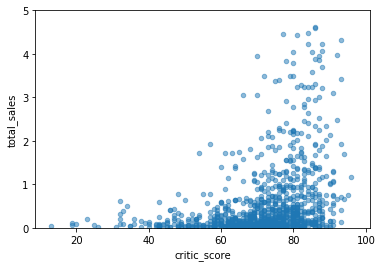

In [108]:
# Посторим аналогичную диаграмму для оценок критиков
relevant_game_data.plot.scatter('critic_score', 'total_sales', alpha=0.5)
plt.ylim(0, 5)

(0, 5)

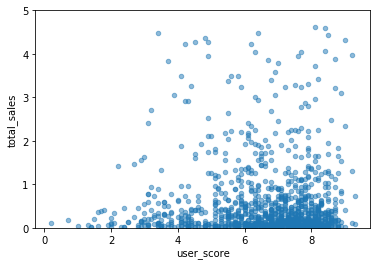

In [109]:
# Посторим аналогичную диаграмму для пользовательских оценок
relevant_game_data.plot.scatter('user_score', 'total_sales', alpha=0.5)
plt.ylim(0, 5)

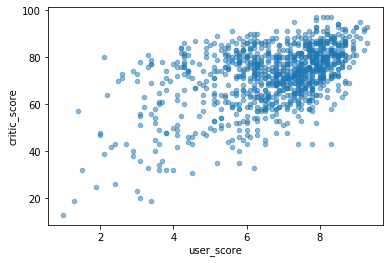

In [110]:
# Посмтроим диаграмму зависимости оценок между собой
relevant_game_data.plot.scatter('user_score', 'critic_score', alpha=0.5)

В целом закономерности совпадают с PS4.

<div class="alert alert-block alert-success">
Хороший подробный обзор. Корреляция рассчитана верно. Понравилось, что проверяешь (как в случае GTA) свои результаты на коректность
</div>
    
---
    

### Исследование жанров

In [111]:
# Выведем топ популярных жанров
games_data['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Самые популрные жанры - это спорт, экшн и казуальные игры для компаний (Misc).

In [112]:
# Сгруппируем данные, выведем топ по выручке
genres = (games_data
 .groupby(['genre']) 
 .agg(
     games_count = ('total_sales', 'count'),
     total_revenue = ('total_sales', 'sum' )
 )
)
genres.sort_values(by='total_revenue', ascending=False)

,games_count,total_revenue
genre,,
Action,3369,1744.17
Sports,2348,1331.27
Shooter,1323,1052.45
Role-Playing,1498,934.56
Platform,888,827.77
Misc,1750,802.51
Racing,1249,728.67
Fighting,849,447.53
Simulation,873,389.97


In [113]:
# Выведем топ по количеству игр
genres.sort_values(by='games_count', ascending=False)

,games_count,total_revenue
genre,,
Action,3369,1744.17
Sports,2348,1331.27
Misc,1750,802.51
Role-Playing,1498,934.56
Shooter,1323,1052.45
Adventure,1303,237.59
Racing,1249,728.67
Platform,888,827.77
Simulation,873,389.97


В целом картина сохраняется. Изменяется только положение шутеров: их продается чуть меньше, но сами игры стоят дороже.

<div class="alert alert-block alert-success">
И здесь ты не ошибся
</div>
    
---
    

## Портрет пользователей

### Платформы

In [114]:
# Определим самые популярные платформы для Америки
na_platform = (relevant_game_data
 .groupby(['platform']) 
 .agg(total_revenue = ('na_sales', 'sum' ))
)
na_platform.sort_values(by='total_revenue', ascending=False).head(5)

,total_revenue
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,39.04


In [115]:
# Определим самые популярные платформы для Европы
eu_platform = (relevant_game_data
 .groupby(['platform']) 
 .agg(total_revenue = ('eu_sales', 'sum' ))
)
eu_platform.sort_values(by='total_revenue', ascending=False).head(5)

,total_revenue
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,31.17


In [116]:
# Определим самые популярные платформы для Японии
jp_platform = (relevant_game_data
 .groupby(['platform']) 
 .agg(total_revenue = ('jp_sales', 'sum' ))
)
jp_platform.sort_values(by='total_revenue', ascending=False).head(5)

,total_revenue
platform,
3DS,67.86
PS3,23.35
PSV,18.66
PS4,15.96
WiiU,10.88


In [117]:
# Объеденим данные
country_platforms = na_platform.join(eu_platform, how='left' , lsuffix='_na', rsuffix='_eu').join(jp_platform, how='left')
country_platforms.columns =['total_revenue_na', 'total_revenue_eu', 'total_revenue_jp']
country_platforms

,total_revenue_na,total_revenue_eu,total_revenue_jp
platform,,,
3DS,39.04,31.17,67.86
PC,11.11,25.36,0.00
PS3,63.50,67.81,23.35
PS4,108.74,141.09,15.96
PSV,5.15,6.15,18.66
WiiU,29.21,19.85,10.88
X360,81.66,42.52,0.51
XOne,93.12,51.59,0.34


В Америке и Европе ситуация похожа: топ 5 занимают последние два поколения Xbox и PS. А вот в Японии ситуация кардинально иная: первое место занимает поратитивная консоль 3DS, а все остальные места занимают исключительно японские консоли.

<div class="alert alert-block alert-success">
Здесь всё достаточно ожидаемо. Идем дальше
</div>
    
---
    

### Жанры

In [118]:
# Определим самые популярные жанры для Америки
na_genres = (relevant_game_data
 .groupby(['genre']) 
 .agg(total_revenue = ('na_sales', 'sum' ))
)
na_genres.sort_values(by='total_revenue', ascending=False).head(5)

,total_revenue
genre,
Action,124.53
Shooter,109.78
Sports,65.12
Role-Playing,46.51
Misc,24.00


In [119]:
# Определим самые популярные жанры для Европы
eu_genres = (relevant_game_data
 .groupby(['genre']) 
 .agg(total_revenue = ('eu_sales', 'sum' ))
)
eu_genres.sort_values(by='total_revenue', ascending=False).head(5)

,total_revenue
genre,
Action,116.95
Shooter,87.88
Sports,59.60
Role-Playing,37.02
Racing,20.19


In [120]:
# Определим самые популярные жанры для Японии
jp_genres = (relevant_game_data
 .groupby(['genre']) 
 .agg(total_revenue = ('jp_sales', 'sum' ))
)
jp_genres.sort_values(by='total_revenue', ascending=False).head(5)

,total_revenue
genre,
Role-Playing,50.11
Action,39.65
Misc,8.98
Fighting,7.63
Shooter,6.61


In [121]:
# Объеденим данные
country_genres = na_genres.join(eu_genres, how='left' , lsuffix='_na', rsuffix='_eu').join(jp_genres, how='left')
country_genres.columns =['total_revenue_na', 'total_revenue_eu', 'total_revenue_jp']
country_genres

,total_revenue_na,total_revenue_eu,total_revenue_jp
genre,,,
Action,124.53,116.95,39.65
Adventure,7.18,8.09,5.11
Fighting,15.55,8.55,7.63
Misc,24.00,17.04,8.98
Platform,16.72,14.31,4.79
Puzzle,0.83,1.00,1.18
Racing,13.04,20.19,2.30
Role-Playing,46.51,37.02,50.11
Shooter,109.78,87.88,6.61


Опять в Европе и Америке ситуация почти идентична, и топ занимают развлекательные жанры, в то время, как в Японии в топе находятся РПГ и игры для компаний.  
От себя отмечу, что корректно было бы разделить в данных жанр *Role-Playing* на два: *RPG* и *JRPG*, так как это абсолютно два разных жанра со своими устоявшимися традициями и правилами. Среди японцев доминирует именно *JRPG*.

### Рейтинг

In [122]:
# Изучим виды рейтингов от ESRB 
relevant_game_data['rating'].value_counts()

M       369
T       333
E       288
E10+    244
Name: rating, dtype: int64

(-0.5, 2.5)

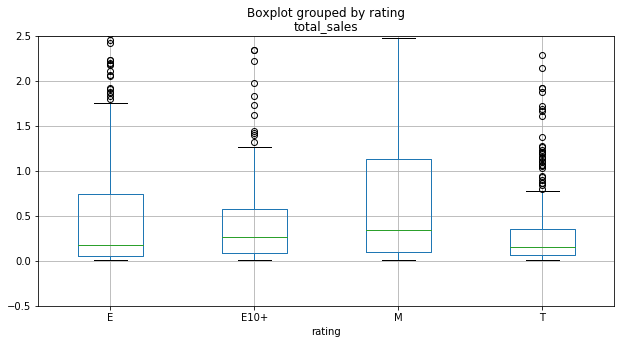

In [123]:
# Построим boxplot по общим продажам
relevant_game_data.boxplot('total_sales', by='rating', figsize=(10,5)) 
plt.ylim(-0.5, 2.5)

Люди предпочитают две крайности: миролюбивые игры для всех (*Е*) и игры для взрослых(*М*).

(-0.5, 1.2)

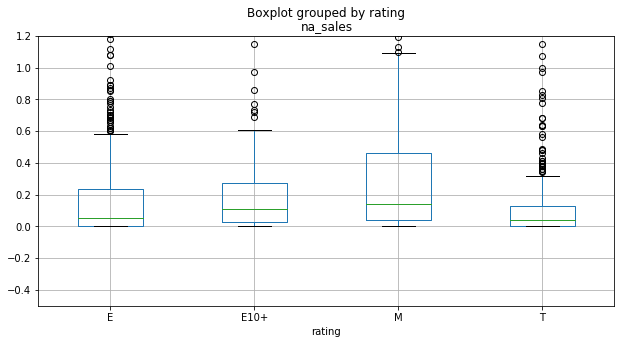

In [124]:
# Построим boxplot по продажам в Америке
relevant_game_data.boxplot('na_sales', by='rating', figsize=(10,5)) 
plt.ylim(-0.5, 1.2)

(-0.5, 1.2)

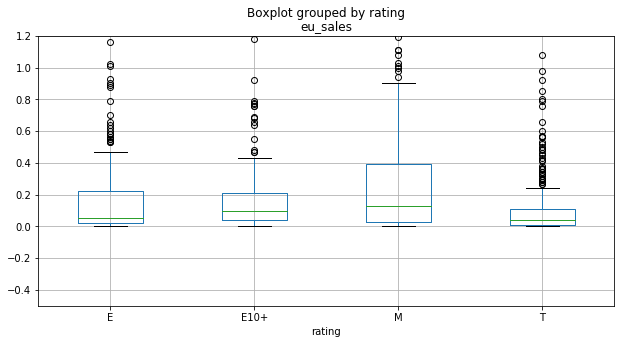

In [125]:
# Построим boxplot по продажам в Европе
relevant_game_data.boxplot('eu_sales', by='rating', figsize=(10,5)) 
plt.ylim(-0.5, 1.2)

(-0.01, 0.2)

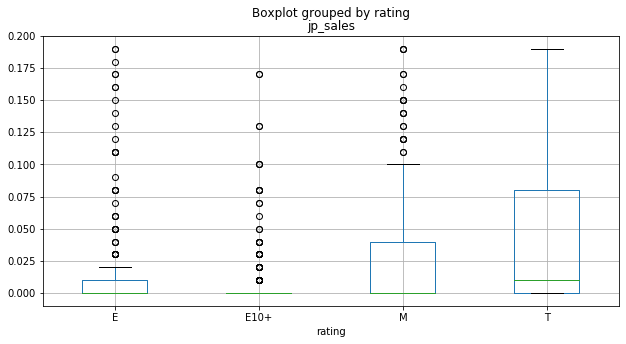

In [126]:
# Построим boxplot по продажам в Японии
relevant_game_data.boxplot('jp_sales', by='rating', figsize=(10,5)) 
plt.ylim(-0.01, 0.2)

В Европе и Америке графики почти совпадают, только в Америке чуть больше продаж. В Японии продаж меньше по всем категориям, при этом есть сильный перекос в сторону подростковых игр.

<div class="alert alert-block alert-success">
Опять же удачный выбор визуала в пользу boxplot.
</div>
    
---
    

## Проверка гипотез

Проверим следующую гипотезу: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".
Будем считать, что игры для этих платформ - это две не пересекающиеся генеральные совокупности, поэтому речь идет о гипотезе о равенстве средних двух генеральных совокупностей по имеющимся выборкам. Пусть гипотеза H0 звучит так: "Средние значения выборок равны", а гипотеза H1: "Средние значения выборок не равны". Для проверки гипотезы применим t-тест Стьюдента. Перед проверкой посчитаем дисперсии выборок.

In [174]:
# Посчитаем дисперсии выборок
sample_x = relevant_game_data.query('platform =="XOne" and ~user_score.isna()')['user_score']
sample_pc= relevant_game_data.query('platform =="PC" and ~user_score.isna()')['user_score']

print ('Дисперсия для Xbox One:', sample1.var())
print ('Дисперсия для PC:', sample2.var() )

Дисперсия для Xbox One: 1.9069968429360695
Дисперсия для PC: 3.035892752408882


(array([ 2.,  3.,  2.,  8.,  5., 11.,  6.,  8., 18., 11., 22., 30., 15.,
        12.,  2.]),
 array([1.4       , 1.92666667, 2.45333333, 2.98      , 3.50666667,
        4.03333333, 4.56      , 5.08666667, 5.61333333, 6.14      ,
        6.66666667, 7.19333333, 7.72      , 8.24666667, 8.77333333,
        9.3       ]),
 <a list of 15 Patch objects>)

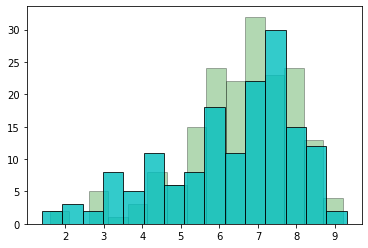

In [187]:
# Построим распределения
plt.hist(sample_x, bins=15, color='g', edgecolor='k', alpha=0.3)
plt.hist(sample_pc, bins=15, color='c', edgecolor='k', alpha=0.8)

Распределения похожи, а значения дисперсий отличаются не значительно, поэтому на вход методу scipy.stats.ttest_ind в качестве параметра equal_var передадим значение True.

In [188]:
# Проверим гипотезу
alpha = .05

results = st.ttest_ind(
    sample1, 
    sample2, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value не позволяет нам отвергнуть нулевую гипотезу.

<div class="alert alert-block alert-danger">
Некорректный результат. Ищи в чем может быть причина
</div>
    
---
    

<div style="border:solid  violet  5px; padding: 20px"> <h1 style="color: violet ; margin-bottom:20px">Комментарий ученика</h1>

Исправил.

***

Проверим следующую гипотезу: "Средние пользовательские рейтинги жанров Action и Sports разные".
Игры этих жанров - это две не пересекающиеся генеральные совокупности, поэтому речь идет о гипотезе о равенстве средних двух генеральных совокупностей по имеющимся выборкам. Пусть гипотеза H0 звучит так: "Средние значения выборок равны", а гипотеза H1: "Средние значения выборок не равны". Для проверки гипотезы применим t-тест Стьюдента. Перед проверкой посчитаем дисперсии выборок.

In [198]:
# Посчитаем дисперсии выборок
sample_action = relevant_game_data.query('genre =="Action" and ~user_score.isna()')['user_score']
sample_sports = relevant_game_data.query('genre =="Sports" and ~user_score.isna()')['user_score']

print ('Дисперсия для Action:', sample_action.var())
print ('Дисперсия для Sports:', sample_sports.var() )

Дисперсия для Action: 1.7453988518607317
Дисперсия для Sports: 3.2082737220316844


(array([ 2.,  0.,  6.,  3.,  7., 14., 13., 13., 12., 24., 24., 14., 11.,
        11.,  3.]),
 array([0.2       , 0.77333333, 1.34666667, 1.92      , 2.49333333,
        3.06666667, 3.64      , 4.21333333, 4.78666667, 5.36      ,
        5.93333333, 6.50666667, 7.08      , 7.65333333, 8.22666667,
        8.8       ]),
 <a list of 15 Patch objects>)

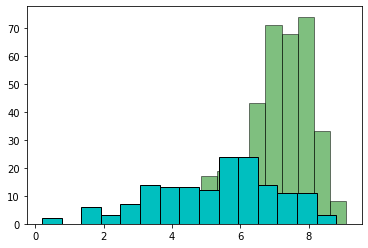

In [199]:
plt.hist(sample_action, bins=15, color='g', edgecolor='k', alpha=0.5)
plt.hist(sample_sports, bins=15, color='c', edgecolor='k')

Распределения сильно отличаются, поэтому на вход методу scipy.stats.ttest_ind в качестве параметра equal_var передадим значение False.

In [203]:
# Проверим гипотезу
alpha = .05

results = st.ttest_ind(
    sample_action, 
    sample_sports, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.626820033321086e-20
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что cредние пользовательские рейтинги отличаются.

<div class="alert alert-block alert-danger">
И здесь результат неверный
</div>
    
---
    

<div style="border:solid  violet  5px; padding: 20px"> <h1 style="color: violet ; margin-bottom:20px">Комментарий ученика</h1>

Исправил.

## Вывод

Почти во всех регионах доминирует последнее поколение консолей: PS4 и Xbox One. В Японии вместо Xbox популярны портативные консоли и предыдущие верси PS. Самые популярные жанры: Action, Shooter, Sports, RPG, Misc. В Америке и Европе популярнее всего игры с ретйтингом Е и М, а в Японии - рейтинг Т.  
Согласно реузльтатам исследования в 17 год следует придерживаться следующих предложений:
* В Америке и Европе сосредоточиться на продажах консольных игр для PS4, PS3, XOne. В Японии дополнительно вложиться в продажу игр на портативной консоли Nintendo 3DS.
* Следует сосредоточиться на продаже самых популярных жанрах: Action,  Sports и Shooter. В Японии сделать ставку на JRPG.


<div class="alert alert-block alert-danger">
А где рекомендации на план стратегии кампании на 2017 год?
</div>
    
---
    

<div style="border:solid  violet  5px; padding: 20px"> <h1 style="color: violet ; margin-bottom:20px">Комментарий ученика</h1>

Исправил.

<div class="alert alert-block alert-warning">
Итог ревью - ты проделал большую серьезную работу, но есть недочеты, которые тебе предстоит скорректировать. Надеюсь ты учтешь мои замечания и отправишь на повторную проверку. Из положительного отмечу, что мне понравилась визуальная составляющая твоего проекта, выводы относительно полученных данных, стремление погрузиться в историю 
</div>
    
---
    

<div class="alert alert-block alert-success">
Здорово. Ты оперативно учел все мои замечания и теперь расчеты верны. Успехов в дальнейшем обучении!
</div>
    
---